<a href="https://colab.research.google.com/github/24jmwangi/KwanzaTukule/blob/main/KWANZA_TUKULE_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Data Analysis case study for Kwanza Tukule using

1. Google colab-data cleaning analysis and transformation using python
2. Github- Deployment of the pipeline and CI/CD
3.Google Cloud Bigquery- storage of data and processing(considerations for later stage)
4. Looker studio and Python Dash- Dashboarding

The Analysis is broken down into
Sections
[Section 1- Data ingestion, cleaning and Loading](#Section1)

[Section 2-Exploratory Data Analysis](#Section2)

[Section 3- Advanced Analysis](#Section3)

[Section 4- Strategic Insights and Recommendations](#Section4)

[Section 5-Dashboard and Reporting](#Section5)

[Section 6- Bonus Section:](#Section6)

#Section 1- Data ingestion, cleaning and Loading

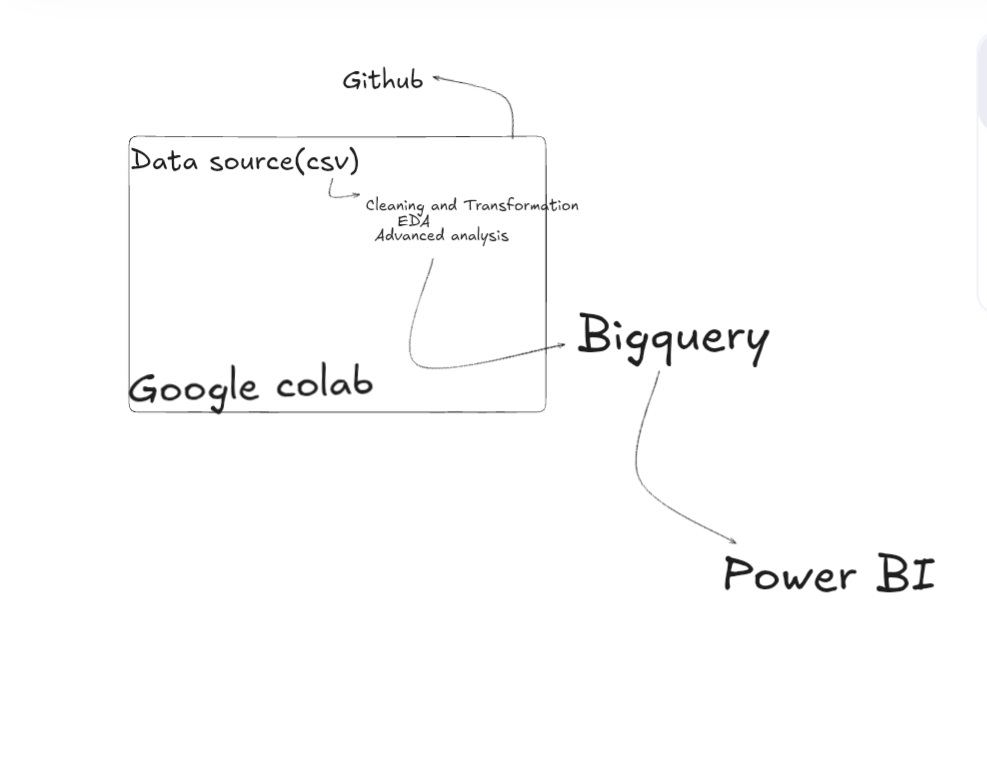

In [1]:
#Architecture  of the Pipeline
from IPython.display import Image, display

# Define the image path
#image_path = '/content/Screenshot_20250123_203712_Chrome.jpg'

# Display the image
display(Image(filename='Screenshot_20250123_203712_Chrome.jpg'))
# Display the image
#display(Image(filename=image_path))

In [2]:

# data ingestion
import pandas as pd
import gspread
from google.oauth2 import service_account
import os
from oauth2client.service_account import ServiceAccountCredentials

"""

#Using colab
# Authenticate with Google API
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

creds = ServiceAccountCredentials.from_json_keyfile_name('/content/kwanzatukule-448718-4ae789931127.json', scope)

client = gspread.authorize(creds)
# Open the Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1E90iFRs0fbn3cldZCQo7cGZ8XmBDYpdHuqeUEC3TGXc/edit#gid=1416790554"
sheet = client.open_by_url(sheet_url)

# Select the worksheet
worksheet = sheet.get_worksheet(0)  # Replace '0' with the sheet index or name if needed

# Fetch all data as a DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head(10))
"""

#Using github actions

import pandas as pd
import gspread
from google.oauth2 import service_account
import os
from oauth2client.service_account import ServiceAccountCredentials

# Load the credentials from GitHub Secrets
creds_json = os.getenv('GOOGLE_APPLICATION_CREDENTIALS')  # This will get the JSON credentials stored in GitHub Secrets
print(creds_json)
# Write the credentials to a temporary file
if creds_json:
    # Write the credentials to a temporary file
    with open('credentials.json', 'w') as f:
        f.write(creds_json)
    print("Credentials successfully written to 'credentials.json'")
else:
    print("Failed to load credentials. Ensure the secret is properly set.")

# Authenticate with Google API
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name('credentials.json', scope)

client = gspread.authorize(creds)

# Open the Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1E90iFRs0fbn3cldZCQo7cGZ8XmBDYpdHuqeUEC3TGXc/edit#gid=1416790554"
sheet = client.open_by_url(sheet_url)

# Select the worksheet
worksheet = sheet.get_worksheet(0)  # Replace '0' with the sheet index or name if needed

# Fetch all data as a DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head(10))

None
Failed to load credentials. Ensure the secret is properly set.


FileNotFoundError: [Errno 2] No such file or directory: 'credentials.json'

In [3]:
# Data Cleaning and Transformation

# Inspect for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Inspect for duplicates
print("\nDuplicate Rows:")
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

# Inspect for inconsistent data types
print("\nData Types:")
print(df.dtypes)

# Resolve issues (example)
# 1. Handle Missing Values (example: fill with mean for numeric columns)
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df[col].isnull().any():
      df[col].fillna(df[col].mean(), inplace = True)

# 2. Remove Duplicate Rows (example)
df.drop_duplicates(inplace=True)

# 3. Convert data types (example)
# If a column should be numeric but has mixed types, convert it
# Check for columns with inconsistent types and apply appropriate conversions.
# Example (replace 'column_name' with the actual column name):
#if 'column_name' in df.columns:
  # try:
      #df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce') # errors='coerce' sets invalid parsing to NaN
  # except:
       # print("Error converting 'column_name'")

# Display the updated DataFrame
print("\nDataFrame after cleaning:")
print(df.head(10))


Missing Values:


NameError: name 'df' is not defined

In [4]:
# Feature Engineering: Create the following columns: “Month-Year” (e.g., August 2024) from the “DATE” column.

import pandas as pd

# Convert 'Date' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Check the DataFrame to ensure conversion
print(df.head())
# Extract 'Month-Year' from the 'date' column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')

# Display the updated DataFrame
print(df[['DATE', 'Month-Year']].head())

NameError: name 'df' is not defined

#Section 2-Exploratory Data Analysis

In [5]:
# Add a 'total value' column

# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# Check the updated column names

df['total_value'] = df['quantity'] * df['unit price']

# Display the updated DataFrame
df.head()

print(df.dtypes)
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['unit price'] = pd.to_numeric(df['unit price'], errors='coerce')

# Recalculate 'total_value' after conversion
df['total_value'] = df['quantity'] * df['unit price']

NameError: name 'df' is not defined

In [6]:
# Group by Anonymized Category
category_summary = df.groupby('anonymized category').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display the summary
print(category_summary)

NameError: name 'df' is not defined

In [7]:
# Group by Anonymized Business
business_summary = df.groupby('anonymized business').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display the summary
# Display only the first 50 rows
print(business_summary.head(50))

NameError: name 'df' is not defined

In [8]:
import matplotlib.pyplot as plt

# Plot total quantity and value for categories
plt.figure(figsize=(12, 6))
plt.bar(category_summary['anonymized category'], category_summary['total_value'], color='skyblue', label='Total Value')
plt.bar(category_summary['anonymized category'], category_summary['quantity'], color='orange', label='Total Quantity')
plt.title('Total Quantity and Value by Anonymized Category')
plt.xlabel('Anonymized Category')
plt.ylabel('Total')
plt.legend()
plt.xticks(rotation=45)
plt.show()

NameError: name 'category_summary' is not defined

<Figure size 1200x600 with 0 Axes>

In [9]:
# Plot total quantity and value for businesses
plt.figure(figsize=(12, 6))
plt.bar(business_summary['anonymized business'], business_summary['total_value'], color='skyblue', label='Total Value')
plt.bar(business_summary['anonymized business'], business_summary['quantity'], color='orange', label='Total Quantity')
plt.title('Total Quantity and Value by Anonymized Business')
plt.xlabel('Anonymized Business')
plt.ylabel('Total')
plt.legend()
plt.xticks(rotation=45)
plt.show()

NameError: name 'business_summary' is not defined

<Figure size 1200x600 with 0 Axes>

In [10]:
from tabulate import tabulate

# Display category summary
print("Category Summary:")
print(tabulate(category_summary, headers='keys', tablefmt='pretty'))

ModuleNotFoundError: No module named 'tabulate'

In [11]:
# Display business summary
print("\nBusiness Summary:")
print(tabulate(business_summary, headers='keys', tablefmt='pretty'))


Business Summary:


NameError: name 'tabulate' is not defined

In [12]:


#Trends Over Time

#Step 1: Ensure Proper Date Format

#Ensure that the Month-Year column is in datetime format. If it's not, convert it.

# Convert 'Month-Year' to datetime format if not already
df['month-year'] = pd.to_datetime(df['month-year'], format='%B %Y', errors='coerce')

# Sort the DataFrame by 'Month-Year'
df = df.sort_values('month-year')




#Step 2: Group by Month-Year

#Aggregate the total Value and Quantity for each Month-Year.

# Group by 'month-year' and calculate total Quantity and Value
time_summary = df.groupby('month-year').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display the summarized data
print(time_summary)




#Step 3: Create a Time Series Plot

#Use Matplotlib to visualize sales trends over time.

import matplotlib.pyplot as plt

# Plot the trends
plt.figure(figsize=(14, 7))

# Plot total value
plt.plot(time_summary['month-year'], time_summary['total_value'], label='Total Value', marker='o', color='blue')

# Plot total quantity
plt.plot(time_summary['month-year'], time_summary['quantity'], label='Total Quantity', marker='o', color='orange')

# Add titles and labels
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('month-year', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


#Step 4: Analyze Seasonal Patterns

#From the plot:

NameError: name 'df' is not defined

Analysis of the Sales Trends Over Time Plot:

1. Blue Line (Total Value):

The total sales value exhibits a clear fluctuation over the months.

High Points: Peaks in total value are observed in certain months (e.g., the beginning and mid-year).

Low Points: A noticeable drop occurs in some months (e.g., early in the second quarter and towards the end of the year).



2. Orange Line (Total Quantity):

The total quantity remains consistently low throughout the year, indicating that high sales value is likely driven by high unit prices rather than the number of units sold.



3. Key Observations:

There is no strong correlation between the quantity sold and the total value. This suggests that some products or categories might have a significantly higher price, contributing to the total value.

Seasonal trends might be influencing the sales value, with certain months performing better.

In [13]:
"""
Performance Analysis
#1: Group by Product

#We need to group the data by the anonymized product column to calculate the total Quantity and Value for each product.

# Group by 'anonymized product' and calculate total Quantity and Value
"""
product_summary = df.groupby('anonymized product').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display the summary
print(product_summary.head())

"""
#Step 2: Identify Top 5 Most Frequently Purchased Products

Sort the product_summary DataFrame by quantity in descending order and extract the top 5.
"""

# Top 5 most frequently purchased products
top_5_quantity = product_summary.sort_values('quantity', ascending=False).head(5)

# Display the results
print("Top 5 Most Frequently Purchased Products:")
print(top_5_quantity)


#Step 3: Identify Top 5 Most Valuable Products

#Sort the product_summary DataFrame by total_value in descending order and extract the top 5.

# Top 5 most valuable products
top_5_value = product_summary.sort_values('total_value', ascending=False).head(5)

# Display the results
print("Top 5 Most Valuable Products:")
print(top_5_value)

NameError: name 'df' is not defined

#SECTION 3: ADVANCED ANALYSIS

In [14]:
# prompt: Create a column summary table for stats

# Create the column summary table
def column_summary(df):
    summary = pd.DataFrame(index=df.columns)
    summary['Data Type'] = df.dtypes
    summary['Unique Values'] = df.nunique()
    summary['Missing Values'] = df.isnull().sum()
    summary['Mean'] = df.mean(numeric_only=True)
    summary['Std Dev'] = df.std(numeric_only=True)
    summary['Min'] = df.min(numeric_only=True)
    summary['Max'] = df.max(numeric_only=True)
    return summary

# Call the function to generate the summary table
column_stats = column_summary(df)

# Display the summary table
print(tabulate(column_stats, headers='keys', tablefmt='psql'))

NameError: name 'df' is not defined

In [15]:


#Customer segmentation

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#
# Grouping by 'anonymized business' and aggregating total quantity, total value, and transaction frequency
df_aggregated = df.groupby('anonymized business').agg(
    total_quantity=('quantity', 'sum'),
    total_value=('total_value', 'sum'),
    transaction_frequency=('anonymized business', 'count')
).reset_index()

# Normalize the data for clustering
features = ['total_quantity', 'total_value', 'transaction_frequency']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_aggregated[features])

# Apply K-Means clustering to segment businesses into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
df_aggregated['Segment'] = kmeans.fit_predict(scaled_data)

# Display the segmented DataFrame
print(df_aggregated[['anonymized business', 'Segment']])

# Visualizing the clusters (Total Value vs. Total Quantity)
plt.scatter(df_aggregated['total_value'], df_aggregated['total_quantity'], c=df_aggregated['Segment'], cmap='viridis')
plt.xlabel('Total Value Contributed')
plt.ylabel('Total Quantity Purchased')
plt.title('Business Segmentation Based on Purchasing Behavior')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

Interpreting the Segments:

After running the clustering algorithm, businesses will be assigned to one of the three segments. Below is how we can interpret the groups:

1. High Value Segment:

Characteristics: Businesses with high total value, high quantity, and frequent transactions.

Recommendations:

Loyalty Programs: Offer loyalty programs, exclusive deals, and personalized offers to retain them.

Volume Discounts: Provide volume discounts or special pricing to encourage even higher purchases.

Priority Support: Offer premium customer service or dedicated account managers.


2. Medium Value Segment:

Characteristics: Businesses with moderate total value, moderate quantity, and transaction frequency.

Recommendations:

Cross-Selling: Focus on cross-selling or upselling opportunities to increase total value.

Incentivize Repeat Purchases: Offer incentives for repeat purchases, such as discounts or rewards for frequent transactions.

Targeted Marketing: Create personalized marketing campaigns based on their purchasing behavior to increase engagement.




3. Low Value Segment:

Characteristics: Businesses with low total value, low quantity, and infrequent transactions.

Recommendations:

Introductory Offers: Provide introductory offers or promotions to encourage more purchases.

Address Barriers: Identify barriers to higher spending (e.g., product availability, pricing) and address them.

Educational Content: Offer educational content or product demonstrations to increase the perceived value of your offerings.

In [16]:
# Save df to a new  dataframe2

df2 = df.copy()

NameError: name 'df' is not defined

In [17]:
import pandas as pd


df2['month-year'] = pd.to_datetime(df2['month-year'], format='%Y-%m-%d')

# Set 'month-year' as the index
df2.set_index('month-year', inplace=True)

# Aggregate the data by month to get the total sales
monthly_sales = df2.groupby(pd.Grouper(freq='M'))['total_value'].sum()

# Display the aggregated monthly sales
print(monthly_sales)

NameError: name 'df2' is not defined

In [18]:


### FORECAST
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#df2 is already defined and contains the data

# Convert 'month-year' to datetime and set as index
#df2['month-year'] = pd.to_datetime(df2['month-year'], format='%Y-%m-%d')
#df2.set_index('month-year', inplace=True)

# Aggregate the data by month to get the total sales
monthly_sales = df2.groupby(pd.Grouper(freq='M'))['total_value'].sum()

# Fit Exponential Smoothing model (additive trend and seasonality, seasonal period of 12 months)
hw_model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=4)
hw_fit = hw_model.fit()

# Forecast next 3 months
forecast = hw_fit.forecast(steps=3)

# Create forecast index
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=4, freq='M')[1:]

# Create DataFrame for forecasted values
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Sales'])

# Display forecast
print(forecast_df)

ModuleNotFoundError: No module named 'statsmodels'

In [19]:
# Plot the historical data and forecasted data

plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales', color='blue')

# Plot forecasted data
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red', linestyle='--')

# Add labels and title
plt.title('Sales Forecast for the Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

NameError: name 'monthly_sales' is not defined

<Figure size 1000x600 with 0 Axes>

In [20]:


###ANOMALIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df2 is already defined and contains the data
# Convert 'month-year' to datetime and set as index
#df2['month-year'] = pd.to_datetime(df2['month-year'], format='%Y-%m-%d')
#df2.set_index('month-year', inplace=True)

# Calculate Z-scores for quantity and total_value columns
df2['quantity_zscore'] = (df2['quantity'] - df2['quantity'].mean()) / df2['quantity'].std()
df2['value_zscore'] = (df2['total_value'] - df2['total_value'].mean()) / df2['total_value'].std()

# Define threshold for anomaly detection (e.g., Z-score > 3 or < -3)
quantity_anomalies = df2[df2['quantity_zscore'].abs() > 3]
value_anomalies = df2[df2['value_zscore'].abs() > 3]

# Print detected anomalies
print("Anomalies in Quantity:")
print(quantity_anomalies[['quantity', 'quantity_zscore']])

print("\nAnomalies in Total Value:")
print(value_anomalies[['total_value', 'value_zscore']])

# Plot the data with anomalies
plt.figure(figsize=(10, 6))

# Plot Quantity with anomalies
plt.subplot(2, 1, 1)
plt.plot(df2.index, df2['quantity'], label='Quantity', color='blue')
plt.scatter(quantity_anomalies.index, quantity_anomalies['quantity'], color='red', label='Anomaly', zorder=5)
plt.title('Quantity with Anomalies')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()

# Plot Total Value with anomalies
plt.subplot(2, 1, 2)
plt.plot(df2.index, df2['total_value'], label='Total Value', color='green')
plt.scatter(value_anomalies.index, value_anomalies['total_value'], color='red', label='Anomaly', zorder=5)
plt.title('Total Value with Anomalies')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

NameError: name 'df2' is not defined

EXPLANATION

1. temporary promotions or discounts could cause a sudden surge in both quantity and total value. This is especially likely if the anomalies are concentrated around specific dates.
2. Supply Chain Disruptions:
 Unexpected events like supply chain disruptions (e.g., delays, shortages) can lead to a sudden increase in order quantities to replenish stock. This could result in higher total values as well.
3. Seasonal Fluctuations:
If the product or service is seasonal, anomalies might correspond to peak seasons or holidays when demand is significantly higher.

In [21]:
###Correlation Analysis:Examine relationships between Quantity and Value. Provide insights into which factors drive sales performance.

import pandas as pd
import matplotlib.pyplot as plt




# Calculate the correlation between Quantity and Total Value
correlation = df2['quantity'].corr(df2['total_value'])

print(f"Correlation between Quantity and Total Value: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['quantity'], df['total_value'], alpha=0.5)
plt.title('Relationship between Quantity and Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

#Further analysis (example)
# Group by 'anonymized category' and calculate correlation within each category
category_correlations = df2.groupby('anonymized category')[['quantity', 'total_value']].corr()

print("\nCorrelation by Anonymized Category:")
category_correlations

NameError: name 'df2' is not defined

Specific Observations:

 1.There are some instances where a high Quantity does not correspond to a high Total Value, and vice versa. This indicates that the relationship is not deterministic and that other factors are at play.

Possible Explanations:
 1. Product Pricing: Different products likely have different prices. A high Quantity of low-priced items might not result in a high Total Value compared to a lower Quantity of high-priced items.
 2. Discounts and Promotions: Discounts or promotions could lead to a high Quantity but a lower Total Value

#SECTION 4 - STRATEGIC INSIGHTS

In [22]:
import seaborn as sns
category_sales = df2.groupby('anonymized category').agg(
    total_sales_value=('total_value', 'sum'),
    total_quantity_sold=('quantity', 'sum'),
    average_unit_price=('unit price', 'mean')
).reset_index()

# Sort the categories by total sales value in descending order
category_sales_sorted = category_sales.sort_values(by='total_sales_value', ascending=False)

# Display the top categories
print(category_sales_sorted)

# Visualize the total sales value by category
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales_value', y='anonymized category', data=category_sales_sorted, palette='viridis')
plt.title('Total Sales Value by Product Category')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Category')
plt.show()

NameError: name 'df2' is not defined

Recommendation:

Given its exceptional performance, Category-75 should be prioritized for marketing campaigns. Allocating resources towards promoting products within this category can potentially lead to increased sales, revenue, and market share.

Justification:
The data clearly demonstrates the superior performance of Category-75 compared to other categories. Investing in marketing efforts for this category is likely to yield substantial returns due to its high demand and profit potential.

Additional Considerations:
Competitive Analysis: While Category-75 is currently the top performer, it's crucial to analyze the competition within this category to identify unique selling propositions and competitive advantages.

In [23]:
df3 = df.copy()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df3 contains the data with 'anonymized business' and 'month-year' columns
# Convert 'month-year' to datetime if not already
# df3['month-year'] = pd.to_datetime(df3['month-year'], format='%Y-%m-%d')

# Group by business and month to calculate the purchase frequency
business_frequency = df3.groupby(['anonymized business', pd.Grouper(key='month-year', freq='M')]).size().reset_index(name='purchase_frequency')

# Pivot the data to have businesses as rows and months as columns
business_frequency_pivot = business_frequency.pivot(index='anonymized business', columns='month-year', values='purchase_frequency')

# Calculate the month-to-month change in purchase frequency for each business
business_frequency_pivot_diff = business_frequency_pivot.diff(axis=1).fillna(0)

# Identify businesses with a negative trend in frequency (i.e., reduced frequency)
reduced_frequency_businesses = business_frequency_pivot_diff[business_frequency_pivot_diff.mean(axis=1) < 0]

# Display businesses with reduced frequency
print(reduced_frequency_businesses.head(50))

# Visualize the trends for businesses with reduced frequency
reduced_frequency_businesses.plot(figsize=(12, 6))
plt.title('Businesses with Reduced Purchase Frequency Over Time')
plt.xlabel('Business')
plt.ylabel('Change in Purchase Frequency')
plt.show()

NameError: name 'df' is not defined

Strategies to Re-engage Customers
   1. Personalized Communication:
   2. Tailored Offers: Send targeted promotions and discounts based on past purchase history and preferences.
   3. Exclusive Content: Provide access to exclusive content, such as early access to new products, special offers, or behind-the-scenes information.
   4. Personalized Recommendations: Leverage data to recommend products or services that align with the customer's interests and past purchases.

   5. Loyalty Programs and Rewards:
   6. Tiered Rewards: Offer tiered rewards based on purchase frequency or loyalty level.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
df4 = df.copy()
# df contains the sales data with 'month-year' and 'total_value' columns
#df2['month-year'] = pd.to_datetime(df2['month-year'], format='%Y-%m-%d')
df4.set_index('month-year', inplace=True)
#df4 = df.copy()
# Aggregate sales by month
monthly_sales = df4.groupby(pd.Grouper(freq='M'))['total_value'].sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sales, model='multiplicative', period=6)

# Plot the seasonal components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed Sales')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residuals')
plt.tight_layout()
plt.show()

# Analyzing the seasonal component to identify peak demand periods
seasonal_peak_months = decomposition.seasonal.idxmax()
print("Months with peak seasonal demand:", seasonal_peak_months)

ModuleNotFoundError: No module named 'statsmodels'




Operational Efficiency:improvements to inventory management or supply chain processes based on trends in product performance.
1. Seasonal Demand Planning: Increase inventory and adjust replenishment schedules ahead of peak months.


2. Supply Chain Flexibility: Diversify suppliers and reduce lead times for quicker responses to demand surges.


3. Dynamic Pricing & Promotions: Use dynamic pricing and targeted promotions to balance inventory and maximize revenue.


4. Advanced Forecasting & Inventory Management: Leverage machine learning for accurate demand forecasting and automated inventory systems.


5. Warehouse Optimization: Ensure efficient storage and use cross-docking to speed up order fulfillment.


6. Staffing & Resource Allocation: Hire temporary staff and allocate resources based on demand forecasts.


7. Real-Time Monitoring: Track sales and inventory in real-time for quick adjustments and post-peak reviews.

#DASHBOARD , REPORTING -can be tailored for specific users and needs

In [25]:

!pip install dash jupyter-dash plotly

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from jupyter_dash import JupyterDash
import pandas as pd

/tmp/ipykernel_2049/2850392649.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_2049/2850392649.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [26]:
# Sample data for df5
df5 = df.copy()

# Data preparation: Aggregate by category and other metrics
category_summary = df5.groupby('anonymized category').agg(
    total_quantity=('quantity', 'sum'),
    total_value=('total_value', 'sum')
).reset_index()

# Create the Dash app
app = JupyterDash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Business Insights Dashboard"),

    # Total Quantity and Value by Category
    html.Div([
        html.H3("Total Quantity and Value by Anonymized Category"),
        dcc.Graph(
            id='category-summary',
            figure=px.bar(category_summary, x='anonymized category', y=['total_quantity', 'total_value'],
                          title="Total Quantity and Value by Category")
        )
    ]),
])

# Run the app in Colab
app.run_server(mode="inline")

NameError: name 'df' is not defined

#Bonus Section: PUSHING Boundaries

1. Store data in google bigquery- for faster processing,  connect looker studio or PoweBI for viz
2. CI/CD , github actions to deploy the notebook (analytics pipeline) for more  scaling and observability
3. Infrastructure management using Terraform-later stage

In [27]:
import pandas as pd
import numpy as np
df5 = df.copy()
# Assuming df5 is already loaded in the environment

# 1. Total Quantity and Value by Anonymized Category
category_summary = df5.groupby('anonymized category').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# 2. Top-performing Products and Businesses
top_products = df5.groupby('anonymized product').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index().sort_values(by='total_value', ascending=False)

top_businesses = df5.groupby('anonymized business').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index().sort_values(by='total_value', ascending=False)

# 3. Time-series chart of sales trends
df5['month-year'] = pd.to_datetime(df5['month-year'])
df5.set_index('month-year', inplace=True)
sales_trends = df5.resample('M').agg({'total_value': 'sum'})

# 4. Segmentation Summary of Customer Groups
# Example segmentation: High Value, Medium Value, Low Value based on total_value
thresholds = {
    'High Value': df5['total_value'].quantile(0.75),
    'Medium Value': df5['total_value'].quantile(0.5),
    'Low Value': df5['total_value'].quantile(0.25)
}

def segment(row):
    if row['total_value'] >= thresholds['High Value']:
        return 'High Value'
    elif row['total_value'] >= thresholds['Medium Value']:
        return 'Medium Value'
    else:
        return 'Low Value'

df5['customer_segment'] = df5.apply(segment, axis=1)
customer_segment_summary = df5.groupby('customer_segment').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display summaries
print(category_summary)
print(top_products.head())
print(top_businesses.head())
print(sales_trends.head())
print(customer_segment_summary)

NameError: name 'df' is not defined